Lucas Esteves dos Reis

In [1]:
import pandas as pd
import sqlalchemy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def connection (user,password,host,db):
    '''Function that provides the engine who makes the connection with MySql'''
    return sqlalchemy.create_engine(f"mysql+pymysql://{user}:{password}@{host}/{db}")

def read (table_name):
    '''Function that transforms an SQL table into a dataframe'''
    return pd.read_sql_table(table_name, engine, 'looqbox_challenge')

def query (query):
    '''Function that reads an query in SQL table and transform it into a dataframe'''
    return pd.read_sql_query(query, engine)    
 

In [3]:
engine = connection("looqbox-challenge","looq-challenge","35.199.127.241","looqbox_challenge")

##### Answering questions number 1 to number 5 using Python/SQL:


##### 1. How many products does the company have?

In [4]:
query_code = '''
SELECT COUNT(PRODUCT_COD) 
FROM data_product;
'''

query(query_code)

,COUNT(PRODUCT_COD)
0,9994


##### 2. What are the 10 most expensive products in the company?


In [5]:
query_code = '''
SELECT * 
FROM data_product
ORDER BY PRODUCT_VAL DESC
LIMIT 10
;
'''
query(query_code)

,PRODUCT_COD,PRODUCT_NAME,PRODUCT_VAL,DEP_NAME,DEP_COD,SECTION_NAME,SECTION_COD
0,301409,Whisky Escoces THE MACALLAN Ruby Garrafa 700ml...,741.99,BEBIDAS,2,BEBIDAS,4
1,176185,Whisky Escoces JOHNNIE WALKER Blue Label Garra...,735.90,BEBIDAS,2,BEBIDAS,4
2,315481,Cafeteira Expresso 3 CORACOES Tres Modo Vermelho,499.00,BEBIDAS,2,BEBIDAS,4
3,100280,Vinho Portugues Tinto Vintage QUINTA DO CRASTO...,445.90,BEBIDAS,2,VINHOS,30
4,320046,Escova Dental Eletrica ORAL B D34 Professional...,399.90,PERFUMARIA,8,HIGIENE BUCAL,39
5,190817,Champagne Rose VEUVE CLICQUOT PONSARDIM Garraf...,366.90,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2
6,153795,Champagne Frances Brut Imperial MOET Rose Garr...,359.90,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2
7,311397,Conjunto de Panelas Allegra em Inox TRAMONTINA...,359.00,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2
8,147706,Whisky Escoces CHIVAS REGAL 18 Anos Garrafa 750ml,329.90,BEBIDAS,2,BEBIDAS,4
9,44311,Champagne Frances Demi Sec Nectar Imperial MOE...,315.90,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2


##### 3. What sections do the 'BEBIDAS' and 'PADARIA' departments have?

In [6]:
query_code = '''
SELECT DISTINCT SECTION_NAME, DEP_NAME 
FROM data_product
WHERE DEP_NAME = 'BEBIDAS' OR DEP_NAME = 'PADARIA'
ORDER BY DEP_NAME ASC
;
'''
query(query_code)

,SECTION_NAME,DEP_NAME
0,BEBIDAS,BEBIDAS
1,CERVEJAS,BEBIDAS
2,REFRESCOS,BEBIDAS
3,VINHOS,BEBIDAS
4,DOCES-E-SOBREMESAS,PADARIA
5,GESTANTE,PADARIA
6,PADARIA,PADARIA
7,QUEIJOS-E-FRIOS,PADARIA


##### 4. Which store sold the most products in one day? Which day?

In [7]:
query_code = '''
SELECT ds.SALES_QTY, 
ds.DATE, 
dc.STORE_NAME
from data_store_sales AS ds
join data_store_cad AS dc on dc.STORE_CODE = ds.STORE_CODE
ORDER BY SALES_QTY DESC
LIMIT 1
;
'''
query(query_code)

,SALES_QTY,DATE,STORE_NAME
0,24332,2019-07-03,Chicago


##### 5. Bonus!! What was the total sale of products (in Dollar) of each business area in the first quarter of 2019?

In [8]:
query_code = '''
SELECT SUM(ds.SALES_VALUE),
dc.BUSINESS_NAME
from data_store_sales AS ds
INNER JOIN data_store_cad AS dc on dc.STORE_CODE = ds.STORE_CODE
WHERE ds.DATE BETWEEN '2019-01-01' AND '2019-03-31'
GROUP BY dc.BUSINESS_NAME
;
'''
query(query_code)

,SUM(ds.SALES_VALUE),BUSINESS_NAME
0,80384884.60,Atacado
1,81776691.73,Farma
2,32072326.40,Posto
3,80171122.80,Proximidade
4,81032347.65,Varejo


##### Answering questions number 1 to number 5 using Python/Pandas:


In [9]:
data_product = read('data_product')

In [10]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRODUCT_COD   9994 non-null   int64  
 1   PRODUCT_NAME  9994 non-null   object 
 2   PRODUCT_VAL   9994 non-null   float64
 3   DEP_NAME      9994 non-null   object 
 4   DEP_COD       9994 non-null   int64  
 5   SECTION_NAME  9994 non-null   object 
 6   SECTION_COD   9994 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 546.7+ KB


##### 1. How many products does the company have?

In [11]:
data_product['PRODUCT_COD'].count()

9994

##### 2. What are the 10 most expensive products in the company?

In [12]:
data_product.nlargest(10,'PRODUCT_VAL', 'first')

,PRODUCT_COD,PRODUCT_NAME,PRODUCT_VAL,DEP_NAME,DEP_COD,SECTION_NAME,SECTION_COD
7942,301409,Whisky Escoces THE MACALLAN Ruby Garrafa 700ml...,741.99,BEBIDAS,2,BEBIDAS,4
5374,176185,Whisky Escoces JOHNNIE WALKER Blue Label Garra...,735.90,BEBIDAS,2,BEBIDAS,4
9032,315481,Cafeteira Expresso 3 CORACOES Tres Modo Vermelho,499.00,BEBIDAS,2,BEBIDAS,4
3057,100280,Vinho Portugues Tinto Vintage QUINTA DO CRASTO...,445.90,BEBIDAS,2,VINHOS,30
9237,320046,Escova Dental Eletrica ORAL B D34 Professional...,399.90,PERFUMARIA,8,HIGIENE BUCAL,39
5677,190817,Champagne Rose VEUVE CLICQUOT PONSARDIM Garraf...,366.90,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2
4640,153795,Champagne Frances Brut Imperial MOET Rose Garr...,359.90,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2
8647,311397,Conjunto de Panelas Allegra em Inox TRAMONTINA...,359.00,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2
4449,147706,Whisky Escoces CHIVAS REGAL 18 Anos Garrafa 750ml,329.90,BEBIDAS,2,BEBIDAS,4
1273,44311,Champagne Frances Demi Sec Nectar Imperial MOE...,315.90,MERCEARIA,6,ARTIGOS-PARA-O-LAR,2


##### 3. What sections do the 'BEBIDAS' and 'PADARIA' departments have?

In [13]:
bebidas = data_product.query('DEP_NAME == "BEBIDAS"')
bebidas['SECTION_NAME'].value_counts()

BEBIDAS      1038
VINHOS        522
CERVEJAS      215
REFRESCOS      23
Name: SECTION_NAME, dtype: int64

For Bebidas department we have four sections, that's 
Bebidas, Vinhos, Cervejas and Refrescos.

In [14]:
padaria = data_product.query('DEP_NAME == "PADARIA"')
padaria['SECTION_NAME'].value_counts()

DOCES-E-SOBREMESAS    734
PADARIA               287
QUEIJOS-E-FRIOS       147
GESTANTE                1
Name: SECTION_NAME, dtype: int64

For Padaria department we have four sections, that's 
Doces e Sobremesas, Padaria, Queijos e Frios and Gestante.

##### 4. Which store sold the most products in one day? Which day?

In [15]:
data_store_sales = read('data_store_sales')
data_store_cad = read('data_store_cad')

In [16]:
data_store_cad.head(2)

,STORE_CODE,STORE_NAME,START_DATE,END_DATE,BUSINESS_NAME,BUSINESS_CODE
0,1,Sao Paulo,2006-10-01,,Varejo,1
1,2,Chicago,2007-10-01,,Varejo,1


In [17]:
data_store_sales.head(2)

,STORE_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,2014-11-23,111387.87,7227
1,10,2014-11-23,63256.35,4362


In [18]:
data_store_sales['SALES_QTY'].max()

24332

In [19]:
data_store_sales.query('SALES_QTY == 24332')

,STORE_CODE,DATE,SALES_VALUE,SALES_QTY
32133,2,2019-07-03,377886.88,24332


Store two at 2019-07-03.

In [20]:
data_store_cad.query('STORE_CODE == 2')['STORE_NAME']

1    Chicago
Name: STORE_NAME, dtype: object

Chicago is the store that sold most products on the day 3 of July of 2019.

##### 5. Bonus!! What was the total sale of products (in Dollar) of each business area in the first quarter of 2019?

In [21]:
merge = pd.merge(data_store_sales, data_store_cad, how="inner", on=["STORE_CODE", "STORE_CODE"])

In [22]:
merge.head(1)

,STORE_CODE,DATE,SALES_VALUE,SALES_QTY,STORE_NAME,START_DATE,END_DATE,BUSINESS_NAME,BUSINESS_CODE
0,1,2014-11-23,111387.87,7227,Sao Paulo,2006-10-01,,Varejo,1


In [23]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35762 entries, 0 to 35761
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STORE_CODE     35762 non-null  int64         
 1   DATE           35762 non-null  datetime64[ns]
 2   SALES_VALUE    35762 non-null  float64       
 3   SALES_QTY      35762 non-null  int64         
 4   STORE_NAME     35762 non-null  object        
 5   START_DATE     35762 non-null  object        
 6   END_DATE       35762 non-null  object        
 7   BUSINESS_NAME  35762 non-null  object        
 8   BUSINESS_CODE  35762 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 2.7+ MB


In [24]:
merge = merge[(merge['DATE'] >= '2019-01-01') & (merge['DATE'] <= '2019-03-31')]

In [25]:
merge = merge.loc[:,['SALES_VALUE','BUSINESS_NAME']]

In [26]:
merge

,SALES_VALUE,BUSINESS_NAME
1498,196623.22,Varejo
1499,307504.48,Varejo
1500,274842.91,Varejo
1501,242439.39,Varejo
1502,205547.18,Varejo
...,...,...
35482,333019.68,Varejo
35483,267015.16,Varejo
35484,255481.16,Varejo
35485,216189.60,Varejo


In [27]:
merge.groupby(['BUSINESS_NAME']).sum()

,SALES_VALUE
BUSINESS_NAME,
Atacado,80384884.60
Farma,81776691.73
Posto,32072326.40
Proximidade,80171122.80
Varejo,81032347.65


### Exploratory Data Analysis

For a better vizualization, first we can use Exploratory Data Analysis(EDA), because it's examine the structure and configuration of data, in addition to learning about the relationship between variables in the database.

In [28]:
IMDB_movies = read('IMDB_movies')
IMDB_movies.head(3)

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.0,757074,333.0,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.0,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.0,157606,138.0,62.0


In [29]:
IMDB_movies.info()
#Question 1. The rating column represents the Rating by IMDB. Metascore represents another website rating.
#Correlation?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1000 non-null   int64  
 1   Title            1000 non-null   object 
 2   Genre            1000 non-null   object 
 3   Director         1000 non-null   object 
 4   Actors           1000 non-null   object 
 5   Year             1000 non-null   int64  
 6   Runtime          1000 non-null   int64  
 7   Rating           1000 non-null   float64
 8   Votes            1000 non-null   int64  
 9   RevenueMillions  872 non-null    float64
 10  Metascore        936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [30]:
#What about if we change the scale of Metascore Rating ?
IMDB_movies.Metascore = IMDB_movies.Metascore/10
IMDB_movies.Metascore

0      7.6
1      6.5
2      6.2
3      5.9
4      4.0
      ... 
995    4.5
996    4.6
997    5.0
998    2.2
999    1.1
Name: Metascore, Length: 1000, dtype: float64

In [31]:
#Checking for Duplicate Data in Key Columns
dup_col = ['Id', 'Title']
IMDB_movies[IMDB_movies.duplicated(dup_col)]


,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore


In [32]:
#Ok. There is no duplicates date. But we will check for missing data.
IMDB_movies.isna().sum()

Id                   0
Title                0
Genre                0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
RevenueMillions    128
Metascore           64
dtype: int64

In [33]:
#So, we can check the rows that have missing 'Revenue Millions' attribute.
IMDB_movies[IMDB_movies.RevenueMillions.isna()].head(10)

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
7,8,Mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.0,2490,NaN,7.1
22,23,Hounds of Love,"Crime,Drama,Horror",Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,7.0,1115,NaN,7.2
25,26,Paris pieds nus,Comedy,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,7.0,222,NaN,NaN
39,40,5- 25- 77,"Comedy,Drama",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2007,113,7.0,241,NaN,NaN
42,43,Don't Fuck in the Woods,Horror,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,3.0,496,NaN,NaN
47,48,Fallen,"Adventure,Drama,Fantasy",Scott Hicks,"Hermione Corfield, Addison Timlin, Joely Richa...",2016,91,6.0,5103,NaN,NaN
49,50,The Last Face,Drama,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,4.0,987,NaN,1.6
61,62,The Autopsy of Jane Doe,"Horror,Mystery,Thriller",André Øvredal,"Brian Cox, Emile Hirsch, Ophelia Lovibond, Mic...",2016,86,7.0,35870,NaN,6.5
70,71,The Promise,"Drama,History",Terry George,"Oscar Isaac, Charlotte Le Bon, Christian Bale,...",2016,133,6.0,149791,NaN,4.9
103,104,Contratiempo,"Crime,Mystery,Thriller",Oriol Paulo,"Mario Casas, Ana Wagener, José Coronado, Bárba...",2016,106,8.0,7204,NaN,NaN


In [34]:
#So, We can use fillna method to replace NaN to 0, but it seems that will bias the data.
#So, let's drop all rows with NaN values.
IMDB_movies = IMDB_movies.dropna()

In [35]:
#Creating 
IMDB_movies['Avg_rating']=IMDB_movies[['Metascore','Rating']].mean(axis=1)
IMDB_movies['Avg_rating']

0      7.80
1      6.75
2      6.60
3      6.45
4      5.00
       ... 
993    4.85
994    5.90
996    5.30
997    5.50
999    3.05
Name: Avg_rating, Length: 838, dtype: float64

In [36]:
IMDB_movies['Genre'].value_counts()
#and if i take only the first word before the comma?

Action,Adventure,Sci-Fi     50
Comedy,Drama,Romance        30
Drama                       29
Drama,Romance               27
Comedy                      26
                            ..
Adventure,Comedy,Fantasy     1
Horror,Mystery,Sci-Fi        1
Action,Thriller,War          1
Action,Comedy,Sport          1
Action,Horror,Romance        1
Name: Genre, Length: 189, dtype: int64

In [37]:
IMDB_movies['First Genre'] = IMDB_movies['Genre'].str.split(',').str[0]
IMDB_movies['Second Genre'] = IMDB_movies['Genre'].str.split(',').str[1]
IMDB_movies['Third Genre'] = IMDB_movies['Genre'].str.split(',').str[2]

In [50]:
IMDB_genre = IMDB_movies[['First Genre','Second Genre','Third Genre','Votes','RevenueMillions']]
IMDB_genre

,First Genre,Second Genre,Third Genre,Votes,RevenueMillions
0,Action,Adventure,Sci-Fi,757074,333.0
1,Adventure,Mystery,Sci-Fi,485820,126.0
2,Horror,Thriller,NaN,157606,138.0
3,Animation,Comedy,Family,60545,270.0
4,Action,Adventure,Fantasy,393727,325.0
...,...,...,...,...,...
993,Action,Adventure,Horror,140900,60.0
994,Comedy,NaN,NaN,164088,55.0
996,Horror,NaN,NaN,73152,18.0
997,Drama,Music,Romance,70699,58.0


In [51]:
IMDB_genre1=IMDB_genre.groupby('First Genre').sum()
IMDB_genre2=IMDB_genre.groupby('Second Genre').sum()
IMDB_genre3=IMDB_genre.groupby('Third Genre').sum()

In [53]:
IMDB_genre_pivot=IMDB_genre1.add(IMDB_genre2, fill_value=0).add(IMDB_genre3,fill_value=0)
IMDB_genre = IMDB_genre_pivot.rename_axis('Genre').reset_index()
IMDB_genre

,Genre,Votes,RevenueMillions
0,Action,69397693.0,35205.0
1,Adventure,65025483.0,38340.0
2,Animation,9359984.0,8653.0
3,Biography,11726607.0,3957.0
4,Comedy,38747908.0,19230.0
5,Crime,25781815.0,8020.0
6,Drama,70364597.0,21244.0
7,Family,6415641.0,5959.0
8,Fantasy,21339758.0,12236.0
9,History,3966950.0,1325.0


In [64]:
IMDB_genre.corr()

,Votes,RevenueMillions
Votes,1.000000,0.936936
RevenueMillions,0.936936,1.000000


In [54]:
IMDB_movies.head()

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore,Avg_rating,First Genre,Second Genre,Third Genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.0,757074,333.0,7.6,7.80,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.0,6.5,6.75,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.0,157606,138.0,6.2,6.60,Horror,Thriller,NaN
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.0,60545,270.0,5.9,6.45,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.0,393727,325.0,4.0,5.00,Action,Adventure,Fantasy


In [55]:
qualitative = ['Title', 'Genre', 'Director', 'Actors','First Genre','Second Genre','Third Genre']
discrete = ['Year', 'Runtime', 'Votes']
continuous = ['Rating', 'RevenueMillions', 'Metascore', 'Avg_rating']

IMDB_movies[continuous].corr()

,Rating,RevenueMillions,Metascore,Avg_rating
Rating,1.000000,0.198860,0.629571,0.835175
RevenueMillions,0.198860,1.000000,0.142384,0.178250
Metascore,0.629571,0.142384,1.000000,0.953108
Avg_rating,0.835175,0.178250,0.953108,1.000000


In [56]:
IMDB_movies[continuous].describe()

,Rating,RevenueMillions,Metascore,Avg_rating
count,838.000000,838.000000,838.000000,838.000000
mean,6.867542,84.550119,5.957518,6.412530
std,0.932807,104.520418,1.695242,1.197403
min,2.000000,0.000000,1.100000,1.750000
25%,6.000000,14.000000,4.700000,5.550000
50%,7.000000,48.000000,6.000000,6.450000
75%,8.000000,117.000000,7.200000,7.350000
max,9.000000,937.000000,10.000000,9.000000


### Data Visualization


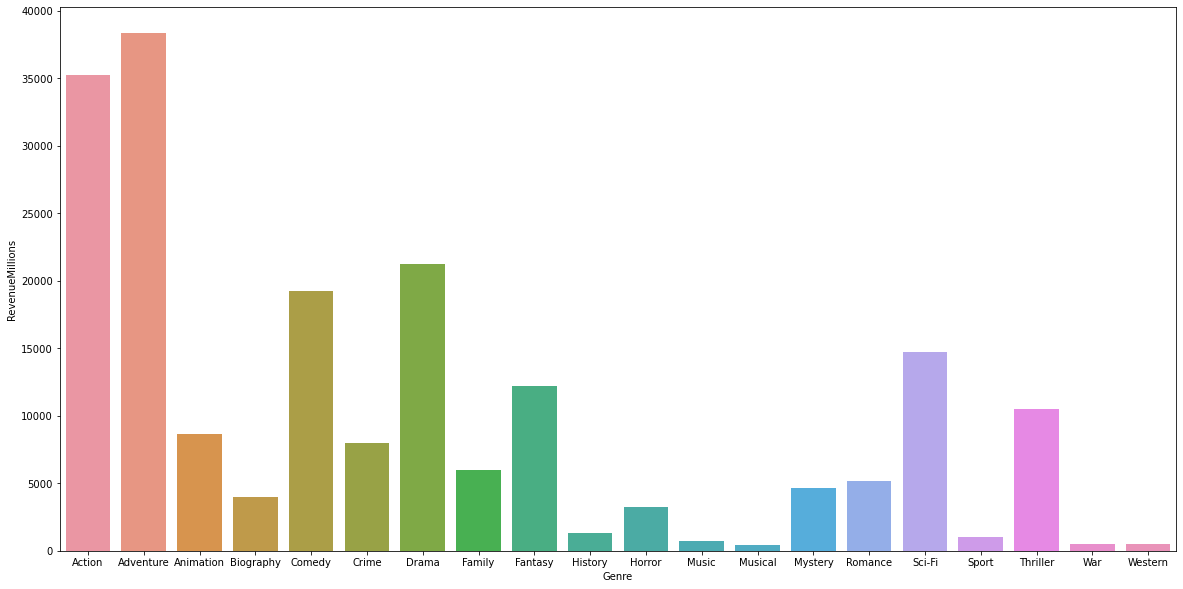

In [85]:
plt.figure(figsize=[20,10]) 
sns.barplot(x='Genre',y='RevenueMillions', data=IMDB_genre) 
plt.show()

#As we have only 20 variables, the information is easily transmitted to the user by a bar plot.
#Movies that fit in the Adventure genre were the grossing ones. 
#Does this relationship also correlate with the votes?

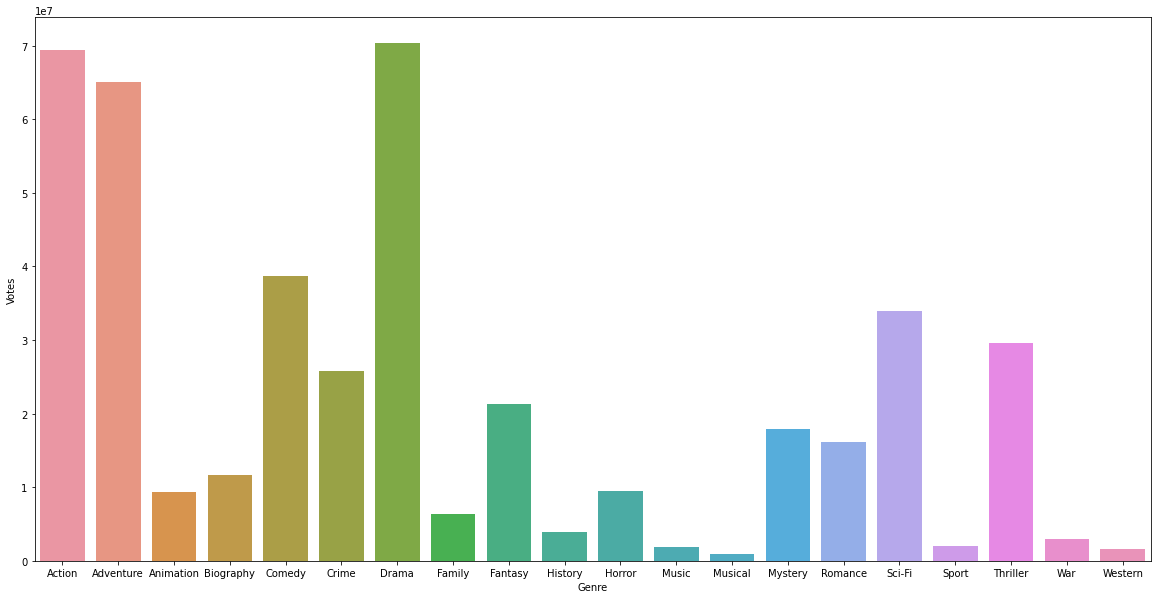

In [84]:
plt.figure(figsize=[20,10]) 
sns.barplot(x='Genre',y='Votes', data=IMDB_genre) 
plt.show()
#We can see the people who vote in IMDB are drama queens. 

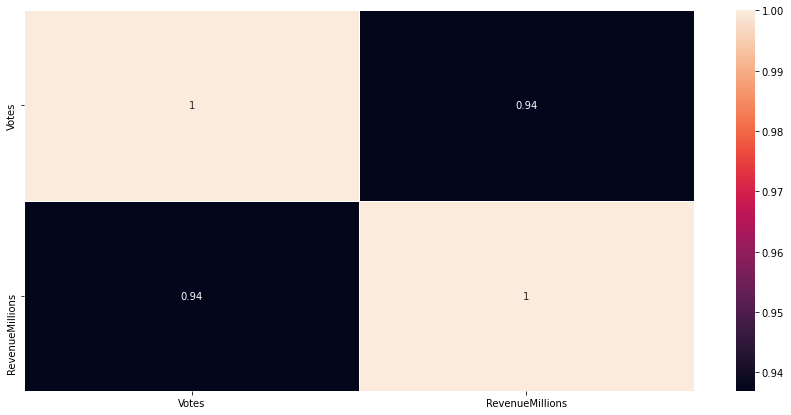

In [81]:
plt.figure(figsize=[15,7])
sns.heatmap(IMDB_genre.corr(), linewidths=.5, annot=True)
plt.show()
#The correlation is great.

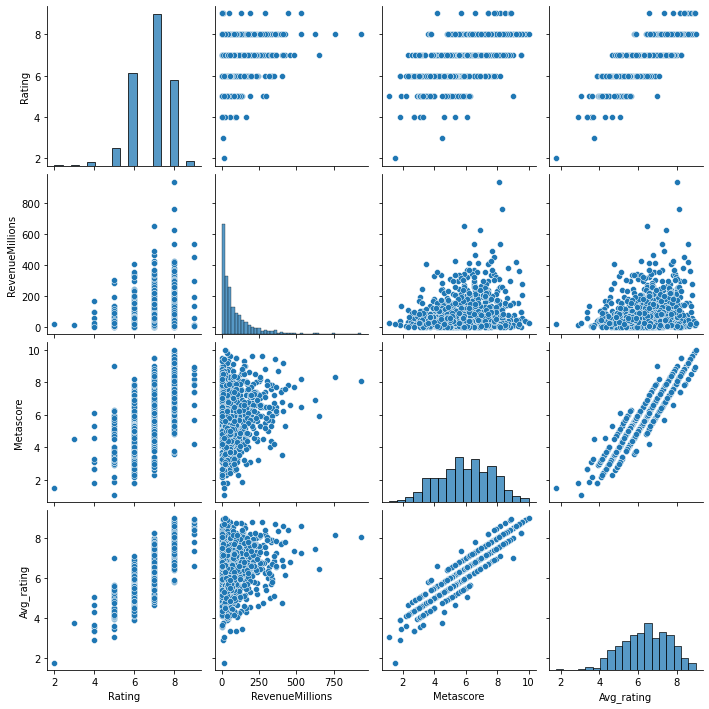

In [80]:
sns.pairplot(IMDB_movies[continuous])
plt.show()

#Scatter chart is great to examine data and search by patterns or relationships, search to a pattern like and apply a linear regression, for example...

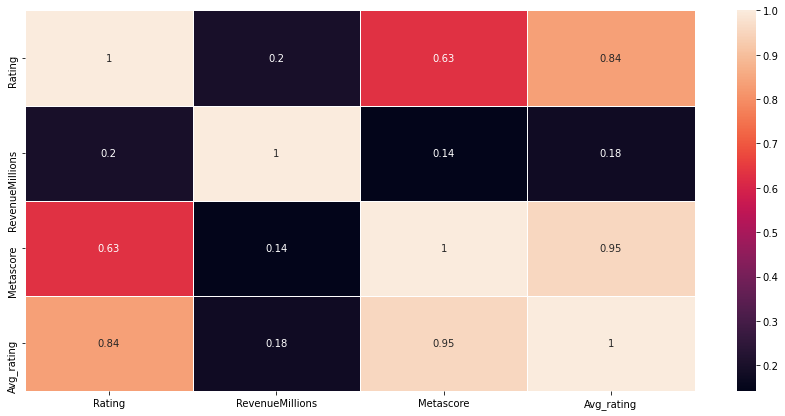

In [76]:
plt.figure(figsize=[15,7])
sns.heatmap(IMDB_movies[continuous].corr(), linewidths=.5, annot=True)
plt.show()

#Heatmaps charts are perfect for representing correlations.

#So, the answer to the first question. We have a moderate correlation about 0.62 between IMDB Rating and Metascore Rating.

#Another interesting thing about, we have a low correlation of less than 0.2 between movies with revenue millions and the Avarege of Ratings.


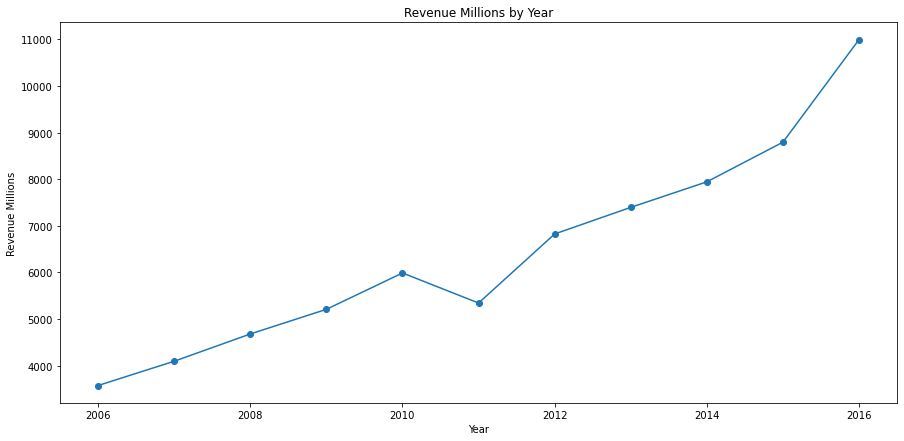

In [78]:
plt.figure(figsize=[15,7])
IMDB_movies.groupby('Year')['RevenueMillions'].agg('sum').plot(marker='o')
plt.title("Revenue Millions by Year")
plt.ylabel('Revenue Millions')
plt.show()

#Line charts are great to show how the data changes over time.

#We see how revenue of the movies increases over the years. Technological advancements.



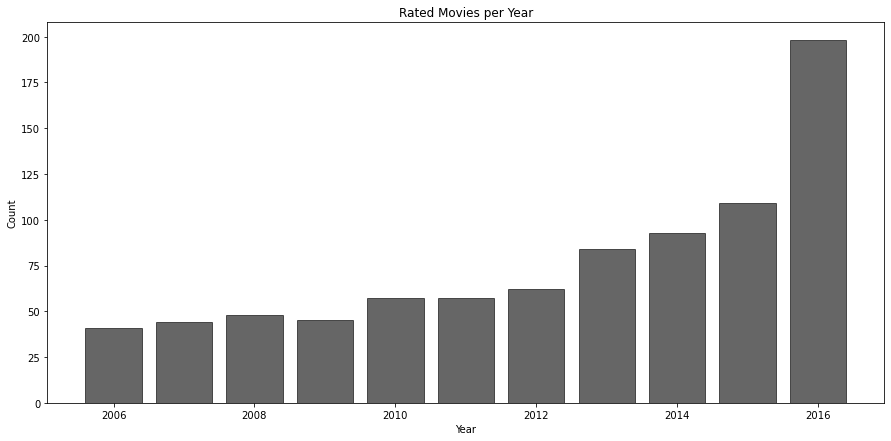

In [149]:
plt.figure(figsize=[15,7])
plt.bar(IMDB_movies.Year.value_counts().index, IMDB_movies.Year.value_counts().values, ec = "k", alpha = .6, color = "black")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of movies rated by year of release")
plt.show()

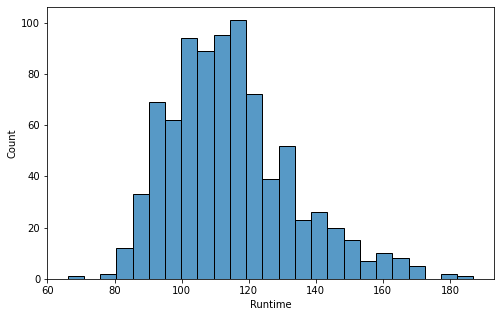

In [104]:
plt.figure(figsize=[8,5])
sns.histplot(IMDB_movies.Runtime)
plt.show()

#The histogram is great to visualize probability distributions, like a Kernel density estimation here.


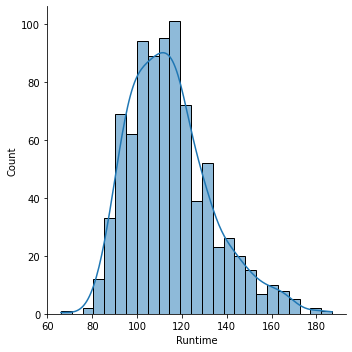

In [150]:
sns.displot(IMDB_movies.Runtime, kde=True)
plt.show()